# RXNBERT Fingerprints from reaction SMILES

## Dataset Description 

##### This dataset originates from a recent publication by a Pfizer team. Utilizing flow chemistry, they conducted a high-throughput reaction screening of the Suzuki–Miyaura C–C coupling reaction. This screening involved 11 reactants, 12 ligands, 8 bases, and 4 solvents, resulting in a total of 5760 reactions. The predictive target in this dataset is the reaction yield. (D. Perera, J. W. Tucker, S. Brahmbhatt, C. J. Helal, A. Chong, W. Farrell, P. Richardson and N. W. Sach, Science, 2018, 359, 429–434.)

###### The objective of this notebook is to obtain Fingerprint with RXNBERT. 
RXNFP has been developed in a collaboration between IBM Research Europe and the Reymond group at the University of Bern. The classification models are used on the RXN for Chemistry platform.
@article{schwaller2021mapping,
  title={Mapping the space of chemical reactions using attention-based neural networks},
  author={Schwaller, Philippe and Probst, Daniel and Vaucher, Alain C and Nair, Vishnu H and Kreutter, David and Laino, Teodoro and Reymond, Jean-Louis},
  journal={Nature Machine Intelligence},
  volume={3},
  number={2},
  pages={144--152},
  year={2021},
  publisher={Nature Publishing Group}
}

##### As a beginner, there may be numerous opportunities for improvement in this notebook. 
I was largely inspired by the work of Alexander A. Ksenofontov and co (10.1016/j.jocs.2023.102173), Jean-Louis Reymond and co (10.1039/d1dd00006c) and the André OLIVEIRA's notebook (Predicting molecule properties based on its SMILES), thanks to them.

In [26]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import os 
import sys
import pickle
import numpy as np
from matplotlib import pyplot as plt
from rdkit.Chem.AllChem import MolFromSmiles, MolFromSmarts
from rdkit.ML.Descriptors.Descriptors import DescriptorCalculator
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
import cairo
import pandas as pd
IPythonConsole.molSize = (300, 300)

## DL DATA

In [2]:
data = r"..\data\Suzuki-Miyaura\aap9112_Data_File_S1.xlsx"

dataF = pd.read_excel(data)

df = dataF.copy()

In [27]:
pd.set_option("display.max_rows", 5760)
pd.set_option("display.max_columns", 16)

In [28]:
df.head(100)

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,...,Solvent_1_Short_Hand_SMART,Catalyst_1_Short_Hand_SMART,Reagent_1_Short_Hand_SMART,Ligand_Short_Hand_SMART,Product,mol,Product_SMART,Chemical_react
0,1,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#6](-[#6])(-[#6])-[#15](-[#6](-[#6])(-[#...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
1,2,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#15](-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
2,3,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#15](-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#7]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
3,4,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]1-[#6]-[#6]-[#6](-[#6]-[#6]-1)-[#15](-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
4,5,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#15](-[...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
5,6,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#15](-[#6]12-[#6]-[#6]3-[#6]-[#6](-[#6]-1)-[#...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
6,7,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#8]-[#6]1:[#6]:[#6]:[#6]:[#6](:[#6]:1-[#...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
7,8,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#6](-[#6])(-[#6])-[#15](-[#6]1-[#6]-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
8,9,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#6](-[#6])-[#6]1:[#6]:[#6](:[#6](:[#6](:...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdki

In [5]:
df.shape

(5760, 16)

## Replace molecule's label by SMILES

I chose SMILES for molecular representation

In [29]:
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-chloroquinoline", "c1cc2cc(ccc2nc1)Cl")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-Bromoquinoline", "c1cc2cc(ccc2nc1)Br")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-triflatequinoline", "c1cc2cc(ccc2nc1)OS(=O)(=O)C(F)(F)F")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-Iodoquinoline", "c1cc2cc(ccc2nc1)I")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-quinoline-boronic acid hydrochloride", "B(c1ccc2c(c1)cccn2)(O)O.Cl")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("Potassium quinoline-6-trifluoroborate", "[B-](c1ccc2c(c1)cccn2)(F)(F)F.[K+]")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-Quinolineboronic acid pinacol ester", "B1(OC(C(O1)(C)C)(C)C)c2ccc3c(c2)cccn3")

In [30]:
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2a, Boronic Acid", "B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O")
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2b, Boronic Ester", "B1(OC(C(O1)(C)C)(C)C)c2c(ccc3c2cnn3C4CCCCO4)C")
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2c, Trifluoroborate", "CCc1cccc(CC)c1.Cc1ccc2c(cnn2C2CCCCO2)c1[B-](F)(F)F.[K+]")
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2d, Bromide", "Cc1ccc2c(c1Br)cnn2C3CCCCO3")

In [31]:
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(tBu)3", "CC(C)(C)P(C(C)(C)C)C(C)(C)C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(Ph)3 ", "c1ccc(cc1)P(c2ccccc2)c3ccccc3")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("AmPhos", "P(c1ccc(cc1)N(C)C)(C(C)(C)C)C(C)(C)C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(Cy)3", "C1CCC(CC1)P(C2CCCCC2)C3CCCCC3")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(o-Tol)3", "Cc1ccccc1P(c2ccccc2C)c3ccccc3C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("CataCXium A", "P(C13CC2CC(C1)CC(C2)C3)(CCCC)C46CC5CC(CC(C4)C5)C6")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("SPhos", "COc1cccc(c1c2ccccc2P(C3CCCCC3)C4CCCCC4)OC")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("dtbpf", "CC(C)(C)P([C]1[CH][CH][CH][CH]1)C(C)(C)C.CC(C)(C)P([C]1[CH][CH][CH][CH]1)C(C)(C)C.[Fe]")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("XPhos", "CC(C)c1cc(c(c(c1)C(C)C)c2ccccc2P(C3CCCCC3)C4CCCCC4)C(C)C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("dppf", "c1ccc(cc1)P(c2ccccc2)C34C5[Fe]3678912(C5C6C74)C3C8C9C1(C23)P(c1ccccc1)c1ccccc1")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("Xantphos", "CC1(c2cccc(c2Oc3c1cccc3P(c4ccccc4)c5ccccc5)P(c6ccccc6)c7ccccc7)C")

In [32]:
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("NaOH", "[OH-].[Na+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("NaHCO3", "C(=O)(O)[O-].[Na+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("CsF", "[F-].[Cs+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("K3PO4", "[O-]P(=O)([O-])[O-].[K+].[K+].[K+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("KOH", "[OH-].[K+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("LiOtBu", "[Li+].CC(C)(C)[O-]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("Et3N", "CCN(CC)CC")

In [33]:
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("MeCN", "CC#N")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("DMF", "CN(C)C=O")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("THF", "C1CCOC1")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("MeOH", "CO")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("MeOH/H2O_V2 9:1", "CO")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("THF_V2", "CO")

In [34]:
df["Catalyst_1_Short_Hand"] = df["Catalyst_1_Short_Hand"].replace("Pd(OAc)2", "CC(=O)[O-].CC(=O)[O-].[Pd+2]")

## Adding features : SMART (converting from SMILES)

In [35]:
# Function to convert a smiles to smart
def smiles_to_smart(name):
    mol = Chem.MolFromSmiles(name)
    sma = Chem.MolToSmarts(mol)
    return sma

In [36]:
# Add "Reactant_1_Name_SMART"
df["Reactant_1_Name_SMART"] = df["Reactant_1_Name"].apply(smiles_to_smart)

# Add "Reactant_2_Name_SMART"
df["Reactant_2_Name_SMART"] = df["Reactant_2_Name"].apply(smiles_to_smart)

# Add "Solvent_1_Short_Hand_SMART"
df["Solvent_1_Short_Hand_SMART"] = df["Solvent_1_Short_Hand"].apply(lambda x: smiles_to_smart(x))  # other way 

# Add "Catalyst_1_Short_Hand_SMART"
df["Catalyst_1_Short_Hand_SMART"] = df["Catalyst_1_Short_Hand"].apply(smiles_to_smart)

In [37]:
# Add "Reagent_1_Short_Hand_SMART"
for index, value in df["Reagent_1_Short_Hand"].items():  
    if not isinstance(value, float): # check is values egal to nan (float)
        df.at[index, "Reagent_1_Short_Hand_SMART"]= smiles_to_smart(value)

# df["Reagent_1_Short_Hand_SMART"] = df["Reagent_1_Short_Hand"].apply(smiles_to_smart) ## doesn't work so replace it one by one, because some values are egal to nan

# Add "Ligand_Short_Hand_SMART"
for index, value in df["Ligand_Short_Hand"].items():
    if not isinstance(value, float): 
        df.at[index,"Ligand_Short_Hand_SMART"] = smiles_to_smart(value)

In [38]:
df.shape

(5760, 26)

## Creat the Product Feature

In [39]:
df["Product"] = "Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1"  # SMILE obtaint thanks to Chemdraw 

In [40]:
#Method transforms smiles strings to mol rdkit object
df['mol'] = df['Product'].apply(lambda x: Chem.MolFromSmiles(x))

#Now let's see what we've got
print(df['mol'][0])

#Now let's see what we've got
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


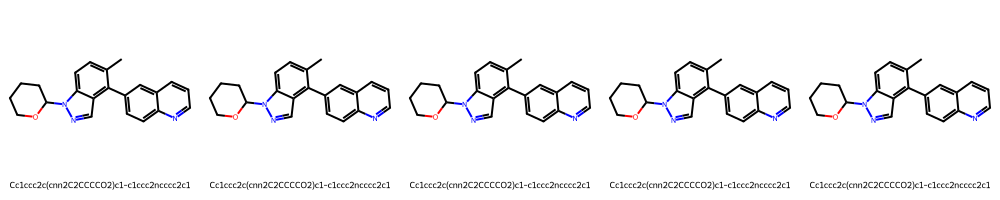

In [41]:
mols = df['mol'][:5]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['Product'][:5].values))

In [42]:
df["Product_SMART"] = smiles_to_smart("Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1")

In [43]:
df.head()

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,...,Solvent_1_Short_Hand_SMART,Catalyst_1_Short_Hand_SMART,Reagent_1_Short_Hand_SMART,Ligand_Short_Hand_SMART,Product,mol,Product_SMART,Chemical_react
0,1,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#6](-[#6])(-[#6])-[#15](-[#6](-[#6])(-[#...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEDEC...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
1,2,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#15](-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEE76...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
2,3,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#15](-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#7]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEE76...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
3,4,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]1-[#6]-[#6]-[#6](-[#6]-[#6]-1)-[#15](-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEE76...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...
4,5,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8-].[Na+],[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#15](-[...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000001DEE76...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...,c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)...


## Creat all chemical reaction SMILE

In [44]:
df["Ligand_Short_Hand"].fillna("", inplace=True)
df["Reagent_1_Short_Hand"].fillna("", inplace=True)

df["Chemical_react"] = df["Reactant_1_Name"].str.cat(df["Reactant_2_Name"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Solvent_1_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Catalyst_1_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Reagent_1_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Ligand_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Product"], sep='>>')


In [45]:
df["Chemical_react"][0]

'c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O.CC#N.CC(=O)[O-].CC(=O)[O-].[Pd+2].[OH-].[Na+].CC(C)(C)P(C(C)(C)C)C(C)(C)C>>Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1'

In [46]:
df["Chemical_react"][93]

'c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O.CC#N.CC(=O)[O-].CC(=O)[O-].[Pd+2]..c1ccc(cc1)P(c2ccccc2)C34C5[Fe]3678912(C5C6C74)C3C8C9C1(C23)P(c1ccccc1)c1ccccc1>>Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1'

## Fingerprint RXNFP one chemical reaction

Generate RXNBERT fingerprints from reaction SMILES

In [48]:
from rxnfp.transformer_fingerprints import (
    RXNBERTFingerprintGenerator, get_default_model_and_tokenizer, generate_fingerprints
)

model, tokenizer = get_default_model_and_tokenizer()

rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)

example_rxn = "CO.O.O=C(NC(=S)Nc1nc(-c2ccccc2)cs1)c1ccccc1.[Na+].[OH-]>>NC(=S)Nc1nc(-c2ccccc2)cs1"

fp = rxnfp_generator.convert(example_rxn)
print(len(fp))
print(fp[:5])

ModuleNotFoundError: No module named 'rxnfp'

In [25]:
fp[0]

0.9104991555213928

## Fingerprint RXNFP all chemical reaction

In [25]:
rxns = df["Chemical_react"]
fps = rxnfp_generator.convert_batch(rxns)
print(len(fps), len(fps[0]))

NameError: name 'rxnfp_generator' is not defined

In [27]:
X = fps

In [28]:
len(X)

5760

In [29]:
X = np.asarray(X, dtype=np.float32)

array([[-0.9271826 , -0.5543691 , -0.25948697, ...,  1.9661086 ,
        -0.2346875 , -1.3231049 ],
       [-0.877067  , -0.6061853 , -0.26496735, ...,  2.0238762 ,
        -0.29297343, -1.3545521 ],
       [-0.97473466, -0.8937602 , -0.253949  , ...,  2.1728961 ,
        -0.40940624, -1.578342  ],
       ...,
       [-0.6722745 ,  1.1141175 ,  0.20490773, ...,  2.2096615 ,
        -2.1572213 , -1.1233355 ],
       [-0.59030455,  1.0635871 ,  0.11578147, ...,  2.0003061 ,
        -1.96136   , -1.1467954 ],
       [-0.7089296 ,  0.95577383,  0.05281088, ...,  2.0118008 ,
        -1.9419001 , -1.0729669 ]], dtype=float32)

In [30]:
X.shape

(5760, 256)

In [31]:
y = df["Product_Yield_PCT_Area_UV"]
y = y.apply(lambda x: x/100)

In [32]:
df = pd.DataFrame(X)

In [33]:
df.to_csv("finger.csv", index=False)

In [34]:
sub = list(tokenizer.get(248))[0].replace("c", "C")

AttributeError: 'SmilesTokenizer' object has no attribute 'get'